In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv("../../datasets/wipro_eq_stock.csv")

# Display the first few rows of the dataset
data.head()


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,04-01-2010,WIPRO,EQ,680.00,685.0,697.0,675.95,696.35,693.80,691.08,767166,5.300000e+13,NaN,433411,0.5650
1,05-01-2010,WIPRO,EQ,693.80,696.3,708.0,693.55,707.85,704.75,699.33,1120433,7.840000e+13,NaN,706061,0.6302
2,06-01-2010,WIPRO,EQ,704.75,706.0,710.0,687.00,693.00,690.50,693.46,1029382,7.140000e+13,NaN,590142,0.5733
3,07-01-2010,WIPRO,EQ,690.50,695.0,695.5,675.00,678.00,678.25,679.45,1031096,7.010000e+13,NaN,572349,0.5551
4,08-01-2010,WIPRO,EQ,678.25,679.0,680.0,666.00,666.40,668.05,669.69,642789,4.300000e+13,NaN,270355,0.4206


In [4]:
# Check for missing values
print("Missing values\n" , data.isnull().sum())

Missing values
 Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                355
Deliverable Volume      0
%Deliverble             0
dtype: int64


In [5]:
data["Trades"] = data["Trades"].fillna(data["Trades"].median())
print("Missing values now \n" , data.isnull().sum())


Missing values now 
 Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64


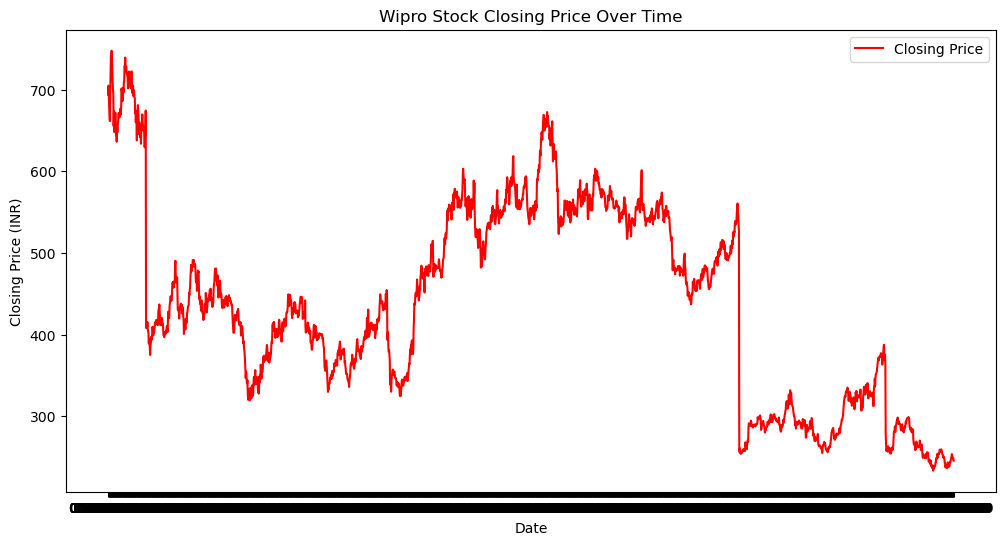

In [ ]:
# Plot the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Closing Price', color='pink')
plt.title('Wipro Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.legend()
plt.show()

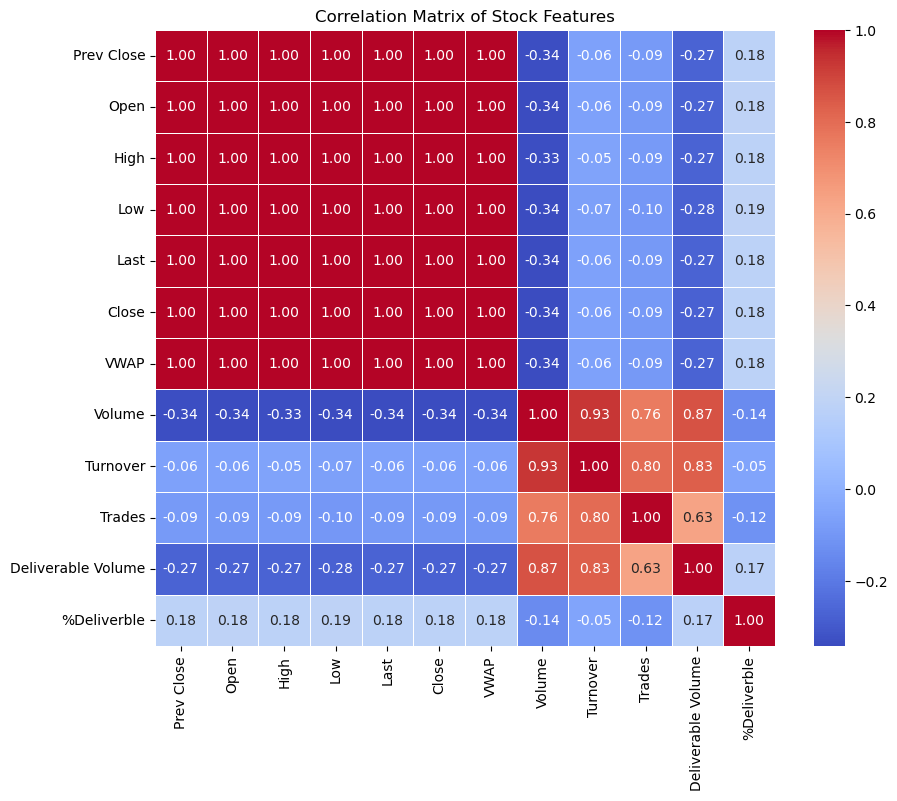

Close                 1.000000
Last                  0.999947
VWAP                  0.999764
High                  0.999376
Low                   0.999205
Open                  0.998488
Prev Close            0.996138
%Deliverble           0.180916
Turnover             -0.061407
Trades               -0.093655
Deliverable Volume   -0.274435
Volume               -0.338713
Name: Close, dtype: float64

In [11]:
import seaborn as sns

# Correlation matrix
correlation_matrix = data.drop(columns=['Date' , 'Symbol' , "Series"]).corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Stock Features')
plt.show()

correlation_matrix['Close'].sort_values(ascending=False)


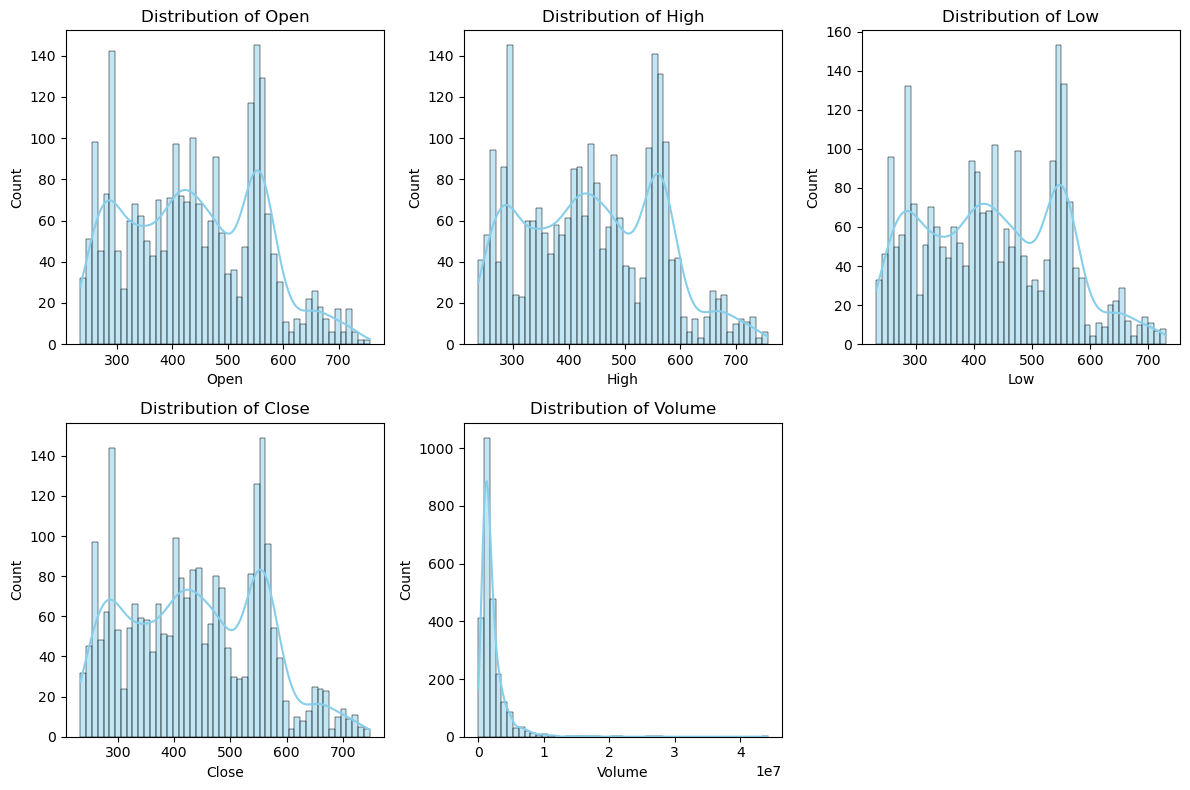

In [12]:
# Plot distribution 
key_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
plt.figure(figsize=(12, 8))
for i, col in enumerate(key_columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data[col], bins=50, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


In [ ]:
# applying single linear regression

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target variable
X = data[["Open"]]
y = data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
single_linear_model = LinearRegression()
single_linear_model.fit(X_train, y_train)

# Make predictions
y_pred = single_linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error = " , mse)
print("R2 Score  = " , r2)


Mean squared error =  39.79925459545618
R2 Score  =  0.9971098247238716


In [ ]:
# applying Multi linear regression

In [16]:

# Select features and target variable
features = ['Open', 'High', 'Low', 'VWAP']
X1 = data[features]
y1 = data['Close']

# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Create and fit the linear regression model
Multi_linear_model = LinearRegression()
Multi_linear_model.fit(X_train1, y_train1)

# Make predictions
y_pred1 = Multi_linear_model.predict(X_test1)

# Evaluate the model
mse1 = mean_squared_error(y_test1, y_pred1)
r21 = r2_score(y_test, y_pred)

print("Mean squared error = " , mse1)
print("R2 Score  = " , r21)

Mean squared error =  5.254833646964339
R2 Score  =  0.9971098247238716


In [17]:
# applying SVM classifier
from sklearn.svm import SVR


In [18]:
# feature selection
X_svm = data[features]
y_svm = data['Close']

In [19]:

# Split the data into training and testing sets
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_svm, y_svm, test_size=0.3, random_state=45)

# Create and fit the SVM model with RBF kernel
svm_model = SVR(kernel='rbf', C=100) 
# C=100 → Regularization parameter:
# Higher C values try to fit the training data more accurately, potentially leading to overfitting.
# Lower C values allow for a softer margin, reducing overfitting but possibly underfitting.
svm_model.fit(X_train_svm, y_train_svm)


SVR(C=100)

In [20]:
# Make predictions
y_pred_svm = svm_model.predict(X_test_svm)

# Evaluate the SVM model
mse_svm = mean_squared_error(y_test_svm, y_pred_svm)
r2_svm = r2_score(y_test_svm, y_pred_svm)
print("mean_squared_error = " , mse_svm)
print("R2 score = " , r2_svm)

mean_squared_error =  7.839213302280799
R2 score =  0.9994818207615679
